In [2]:
from sklearn.datasets import load_iris
import pandas as pd
from  plotnine import *
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing im

# Exercise 1: Multi-Layered Scatter Plot with Marginal Histograms
Objective:

Create a multi-layered scatter plot using plotnine that includes marginal histograms to visualize the distribution of two continuous variables.

Instructions
Choose a dataset with at least two continuous variables (e.g., the Iris dataset).
Load your dataset into a pandas DataFrame.
Import the necessary components from plotnine.
Create a scatter plot mapping the two continuous variables to the x and y axes.
Overlay this plot with marginal histograms along both the x and y axes to show the distribution of each variable.
Customize the plot with titles, labels, and a color scheme that enhances data interpretation.
Display the plot.
Expected Learning Outcome:

Develop skills in creating advanced, multi-layered visualizations that combine scatter plots with histograms using plotnine.

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [ ]:
iris_df.to_csv('iris_dataset.csv', index=False)

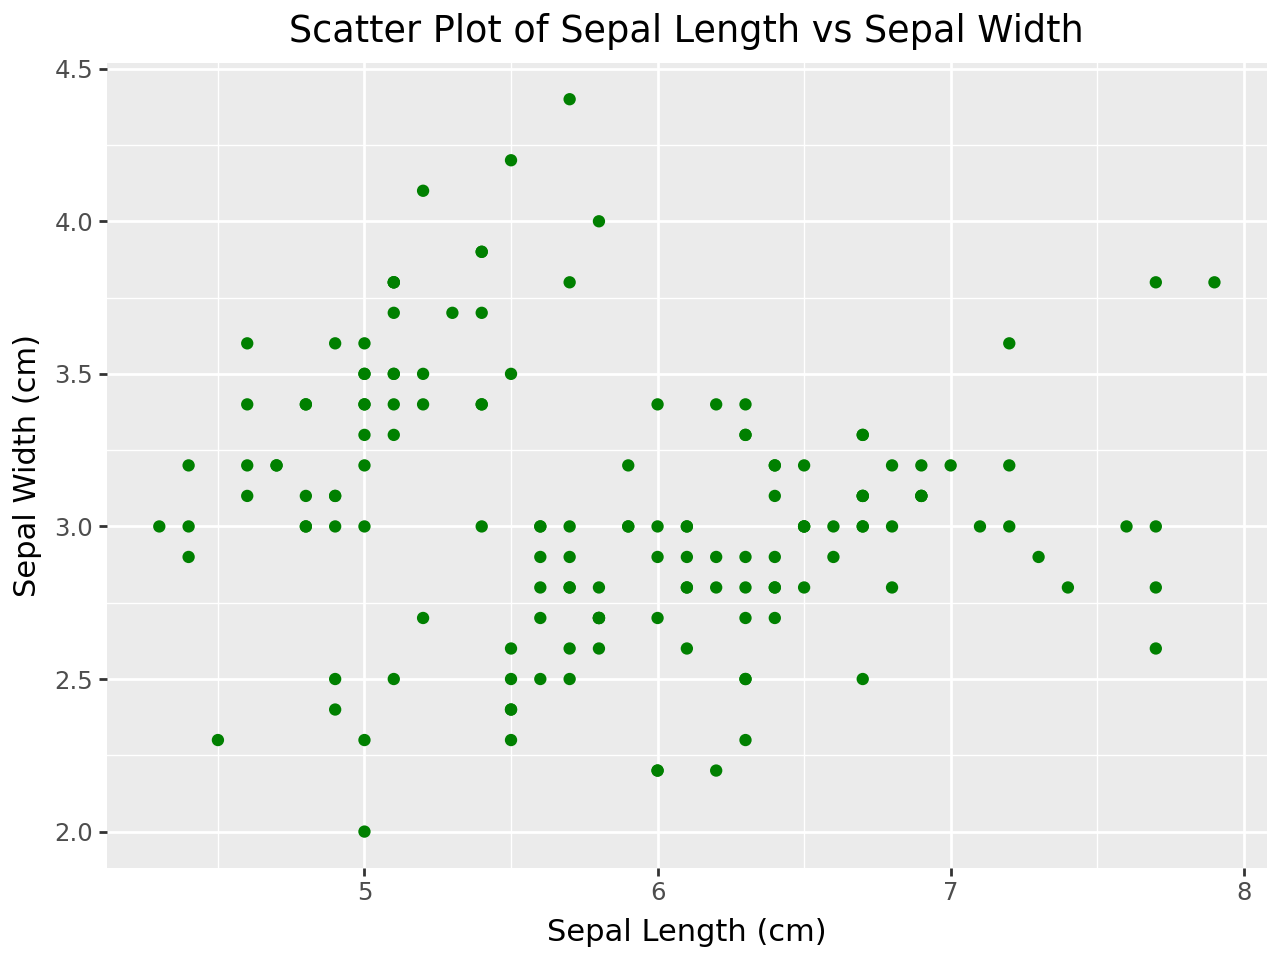

In [ ]:
scatter_plot = (
    ggplot(iris_df, aes(x='sepal length (cm)', y='sepal width (cm)')) +
    geom_point(color='green') +
    labs(
        title='Scatter Plot of Sepal Length vs Sepal Width',
        x='Sepal Length (cm)',
        y='Sepal Width (cm)'
    )
)
scatter_plot

**I did it with total help of chat gpt, cause i dont't understand how to create it att all, so asked it for whole explanation **

In [ ]:
fig =plt.figure(figsize=(10, 10))
ax_main = fig.add_axes([0.1, 0.1, 0.65, 0.65])
ax_main.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], ax = ax_main ,color='green')

x_hist_ax = fig.add_axes([])

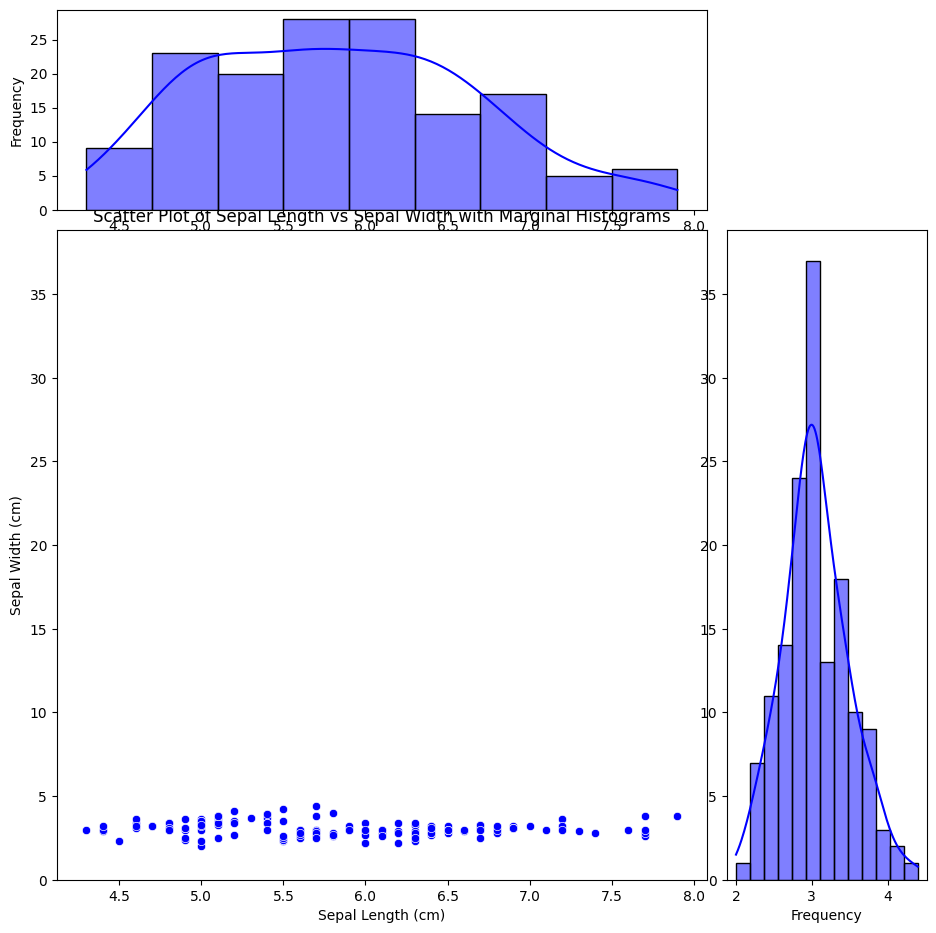

In [ ]:
fig = plt.figure(figsize=(10, 10))

main_ax = fig.add_axes([0.1, 0.1, 0.65, 0.65])
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', ax=main_ax, color='blue')


x_hist_ax = fig.add_axes([0.1, 0.77, 0.65, 0.2], sharex=main_ax)
sns.histplot(iris_df['sepal length (cm)'], ax=x_hist_ax, color='blue', kde=True)
x_hist_ax.set_ylabel('Frequency')
x_hist_ax.set_xlabel('')


y_hist_ax = fig.add_axes([0.77, 0.1, 0.2, 0.65], sharey=main_ax)
sns.histplot(iris_df['sepal width (cm)'], ax=y_hist_ax, color='blue', kde=True, orientation='horizontal')
y_hist_ax.set_xlabel('Frequency')
y_hist_ax.set_ylabel('')

main_ax.set_title('Scatter Plot of Sepal Length vs Sepal Width with Marginal Histograms')
main_ax.set_xlabel('Sepal Length (cm)')
main_ax.set_ylabel('Sepal Width (cm)')

plt.show()

# Exercise 2: Interactive Facet Grid with Conditional Elements
Objective:

Use plotnine to create an interactive facet grid that displays different types of plots (scatter plot, line plot, etc.) based on a categorical variable in the dataset.

Instructions
Select a dataset with both categorical and continuous variables.
Load the dataset into a pandas DataFrame.
Import plotnine and other necessary libraries.
Create a facet grid that segments your data by the categorical variable.
Within each facet, implement a conditional statement that chooses the type of plot (scatter, line, etc.) based on the specific subset of data.
Ensure interactivity, such as tooltips or hover information, where applicable.
Customize the plot with appropriate titles, axis labels, and a legend.
Expected Learning Outcome:

Gain experience in creating complex, conditional visualizations using facet grids in plotnine.

In [ ]:
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

In [ ]:
red_wine = pd.read_csv(url_red, sep=';')
white_wine = pd.read_csv(url_white, sep=';')

In [ ]:
red_wine['wine_type'] = 'Red'
white_wine['wine_type'] = 'White'

In [ ]:
wine_df = pd.concat([red_wine, white_wine], axis=0)


In [ ]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


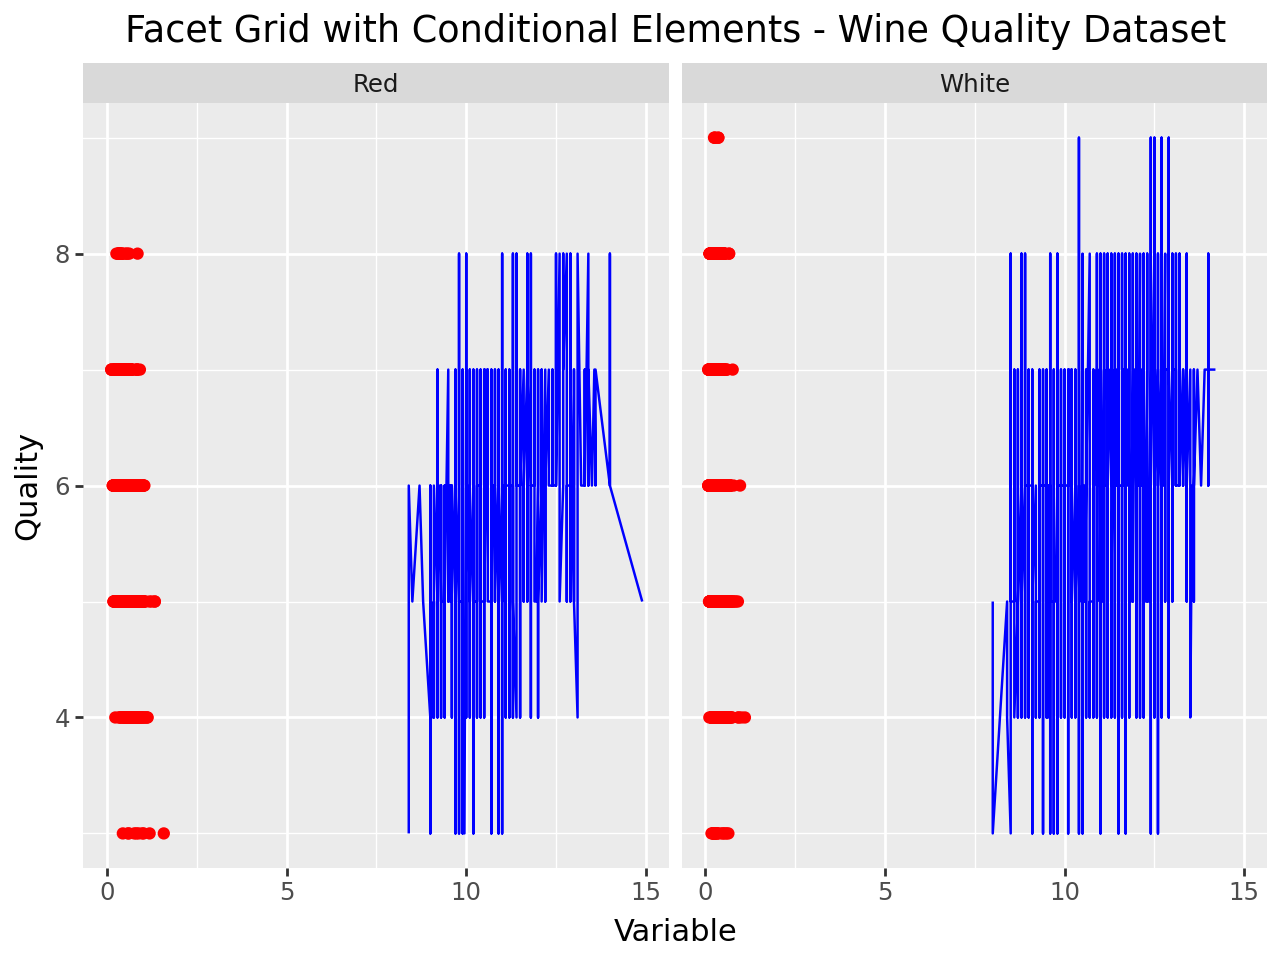

In [ ]:
def choose_geom(subset_name):
    if subset_name == 'Red':
        return geom_point(aes(x='volatile acidity', y='quality'), color='red')
    elif subset_name == 'White':
        return geom_line(aes(x='alcohol', y='quality'), color='blue')
base_plot = ggplot(wine_df, aes())

for wine_type in wine_df['wine_type'].unique():
    base_plot += choose_geom(wine_type)

final_plot = (base_plot +
              facet_wrap('~wine_type') +
              labs(
                  title='Facet Grid with Conditional Elements - Wine Quality Dataset',
                  x='Variable',
                  y='Quality'
              )
)
final_plot

# Exercise 3: Time Series Analysis with Rolling Averages and Confidence Intervals
Objective:

Perform a time series analysis on a dataset using plotnine by plotting rolling averages along with confidence intervals.

Instructions
Choose a time series dataset (e.g., stock market data, temperature over time).
Load the dataset into a pandas DataFrame.
Calculate the rolling average and confidence intervals for a chosen time period.
Import plotnine and other necessary libraries.
Plot the time series data along with the rolling averages.
Add shaded areas to represent confidence intervals around the rolling averages.
Customize your plot with titles, labels, and an intuitive color scheme.
Expected Learning Outcome:

Learn to perform advanced time series analysis and visualization, incorporating statistical measures like rolling averages and confidence intervals.

**I made with synthetic data, because my result on other data set isn't satisfied**

In [3]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')

In [4]:
np.random.seed(0)
sales = np.random.normal(loc=200, scale=20, size=100)

In [5]:
data = pd.DataFrame({'Date': dates, 'Sales': sales})

In [6]:
window = 7  #Calculate the rolling average and confidence intervals

In [18]:
data.head()

,Date,Sales,RollingMean,RollingStd,UpperBound,LowerBound,Upper,Lower
0,2023-01-01,235.281047,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-02,208.003144,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-03,219.574760,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-04,244.817864,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-05,237.351160,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data['RollingMean'] = data['Sales'].rolling(window=window).mean()


data['RollingStd'] = data['Sales'].rolling(window=window).std()

In [16]:
data['UpperBound'] = data['RollingMean'] + 1.96 * data['RollingStd']
data['LowerBound'] = data['RollingMean'] - 1.96 * data['RollingStd']

In [17]:
data['Upper'] = data['RollingMean'] + 1.96 * data['RollingStd'] / np.sqrt(window)
data['Lower'] = data['RollingMean'] - 1.96 * data['RollingStd'] / np.sqrt(window)

In [11]:
data_melted = pd.melt(data, id_vars=['Date', 'Lower', 'Upper'], value_vars=['Sales', 'RollingMean'], var_name='Type', value_name='Value')

In [15]:
data_melted.head()

,Date,Lower,Upper,Type,Value
0,2023-01-01,NaN,NaN,Sales,235.281047
1,2023-01-02,NaN,NaN,Sales,208.003144
2,2023-01-03,NaN,NaN,Sales,219.574760
3,2023-01-04,NaN,NaN,Sales,244.817864
4,2023-01-05,NaN,NaN,Sales,237.351160


/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:99: PlotnineWarning: geom_path: Removed 6 rows containing missing values.


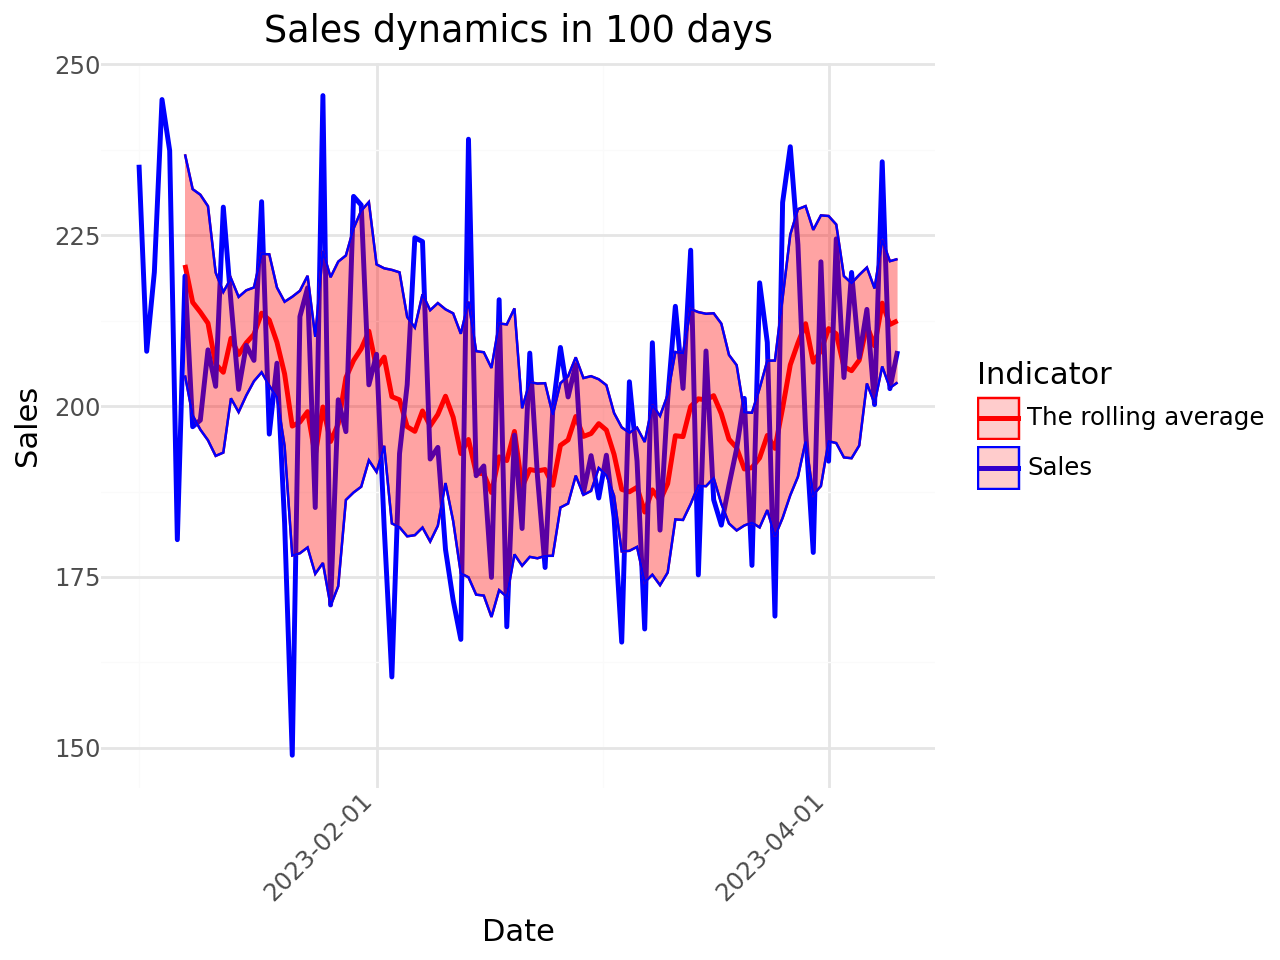

In [13]:
plot = (ggplot(data_melted, aes(x='Date', y='Value', color='Type'))
+ geom_line(size=1)
        + geom_ribbon(aes(ymin='Lower', ymax='Upper'), fill='red', alpha=0.2)
        + labs(title='Sales dynamics in 100 days',
               x='Date',
               y='Sales')
        + scale_color_manual(values={'Sales': 'blue', 'RollingMean': 'red'}, name='Indicator',
                             labels={'Sales': 'Sales', 'RollingMean': 'The rolling average'})
        + theme_minimal()
        + theme(axis_text_x=element_text(rotation=45, hjust=1))
       )
plot

In [21]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [22]:
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("podsyp/time-series-starter-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.86k/1.86k [00:00<00:00, 3.75MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/podsyp/time-series-starter-dataset/versions/2


In [24]:
from google.colab import files
files.upload()

Saving time.zip to time.zip


{'time.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xed\x08\xa2P\xbb\xc3\x89\x9d\xff\xff\xff\xff\xff\xff\xff\xff\x11\x00\x14\x00Month_Value_1.csv\x01\x00\x10\x00\xdd\x10\x00\x00\x00\x00\x00\x00\xc5\x06\x00\x00\x00\x00\x00\x00]\x97\xdd\x8e\x1c\xc7\r\x85\xef\x03\xe4M\x06\x85\xaa\xe2O\x91\x97~\x83 \xf6\xfdb\x11\xafm\x01\xc2n"K\x06\xfc\xf6\xf9\xd8\xdd#\xcd\x94\xb0\x12\xc4\xd99\xcd\xbf\xc3C\xf6\xbf\xde\xbe|\xfa\xf8\xf5\xf6\xef\xb7\xbf\xde\xde\xbf\xbd\xdd~~\xfd\xfc\xf6\xe7\xcb\xff\xbe\xbd\xbe\x7f\xfd\xf4\xf5\xef\xdbO\x7f\xbd}y\xfd\xfd\xed\xe5?\x1f\x7f~\xbd\xfd\xf2\xc7\xdb\xcb\xeb\xf5\xc1\xeb\xfb\xfb\xb7\xd7\xcf/\xff}\xfd\xfb\xcb\xc7\xe7\xcf/\x1f\xbf\xbd|\xe5\xb7_\xde~\xff\xf4\xf1\xfe\xcf\x7f\xf4\xd1\xf8\x99}\xd8mx\x1f\xbd\xaf\xd9\xc6H\xac\xb9f\xf2\xaf\xad\xb6\\L\x87F\xefq\x93\xde\xa7\xfa\xf2\x139/\xa4E_\x16\xab\xa9f\xf0\xa51\\\xfc6\xc4\xa2Y\xf7\xcc\x0c>\x99\x1bVN\xec\x9c]\xd7P\xe7a\xe2\xaa<+\xe7\x04\x1b\xda<\x17\x00]\xb3\xdb\x86\xd5\xcbo\xc4P\x0b\x9e\x94:qks.B\x16k\xde}u\x8d\x91}mP\xbb\xa0\xda\xe

In [25]:
!unzip time.zip

Archive:  time.zip
  inflating: Month_Value_1.csv       


In [72]:
df = pd.read_csv('Month_Value_1.csv')

In [73]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [51]:
df.isna().sum()

,0
Period,0
Revenue,0
Sales_quantity,0
Average_cost,0
The_average_annual_payroll_of_the_region,0
RollingMean,0
RollingStd,0
UpperBound,0
LowerBound,0


In [82]:
df.dropna(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 2 to 63
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    62 non-null     object 
 1   Revenue                                   62 non-null     float64
 2   Sales_quantity                            62 non-null     float64
 3   Average_cost                              62 non-null     float64
 4   The_average_annual_payroll_of_the_region  62 non-null     float64
 5   RollingMean                               62 non-null     float64
 6   RollingStd                                62 non-null     float64
 7   UpperBound                                62 non-null     float64
 8   LowerBound                                62 non-null     float64
dtypes: float64(8), object(1)
memory usage: 6.9+ KB


In [81]:
df.describe()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,RollingMean,RollingStd,UpperBound,LowerBound
count,63,6.300000e+01,63.000000,63.000000,6.300000e+01,61.000000,61.000000,61.000000,61.000000
mean,2017-03-04 18:40:00,3.228786e+07,19273.031746,1681.342635,2.867198e+07,1685.421703,215.042877,2106.905741,1263.937664
min,2015-01-01 00:00:00,1.402148e+07,8314.000000,1110.576805,2.740647e+07,1265.807353,58.075661,1465.008203,720.758920
25%,2016-01-04 12:00:00,2.240672e+07,15164.000000,1489.968278,2.782857e+07,1549.628887,122.250717,1854.134231,1135.396079
50%,2017-01-08 00:00:00,3.165009e+07,18397.000000,1654.384704,2.819785e+07,1735.796887,215.193282,2144.662518,1289.525254
75%,2018-01-11 12:00:00,4.002840e+07,22926.500000,1913.842369,2.987852e+07,1798.589491,291.844876,2300.934411,1403.297296
max,2020-01-04 00:00:00,5.875647e+07,38069.000000,2315.008323,3.002468e+07,2046.839343,441.340528,2788.512185,1827.095831
std,NaN,1.172040e+07,6616.158526,278.027221,1.054782e+06,195.164434,101.273355,310.499509,242.011391


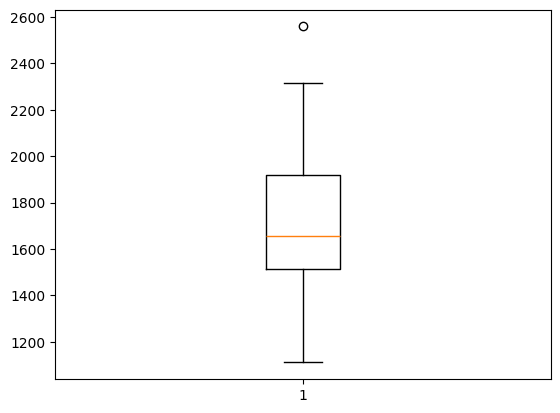

In [56]:
plt.boxplot(df['Average_cost'])
plt.show()

In [75]:
Q1 = df['Average_cost'].quantile(0.25)
Q3 = df['Average_cost'].quantile(0.75)
IQR = Q3 - Q1

In [76]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Average_cost'] >= lower_bound) & (df['Average_cost'] <= upper_bound)]

<ipython-input-60-48a13122ee62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [77]:
df['Period'] = pd.to_datetime(df['Period'])

In [78]:
df['RollingMean'] = df['Average_cost'].rolling(window=3).mean()

In [79]:
df['RollingStd'] = df['Average_cost'].rolling(window=3).std()

In [80]:
df['UpperBound'] = df['RollingMean'] + 1.96 * df['RollingStd']
df['LowerBound'] = df['RollingMean'] - 1.96 * df['RollingStd']

In [83]:
df = df[df['Period'] >= '2018-01-01']

In [66]:
df = df.sort_values(by='Period')

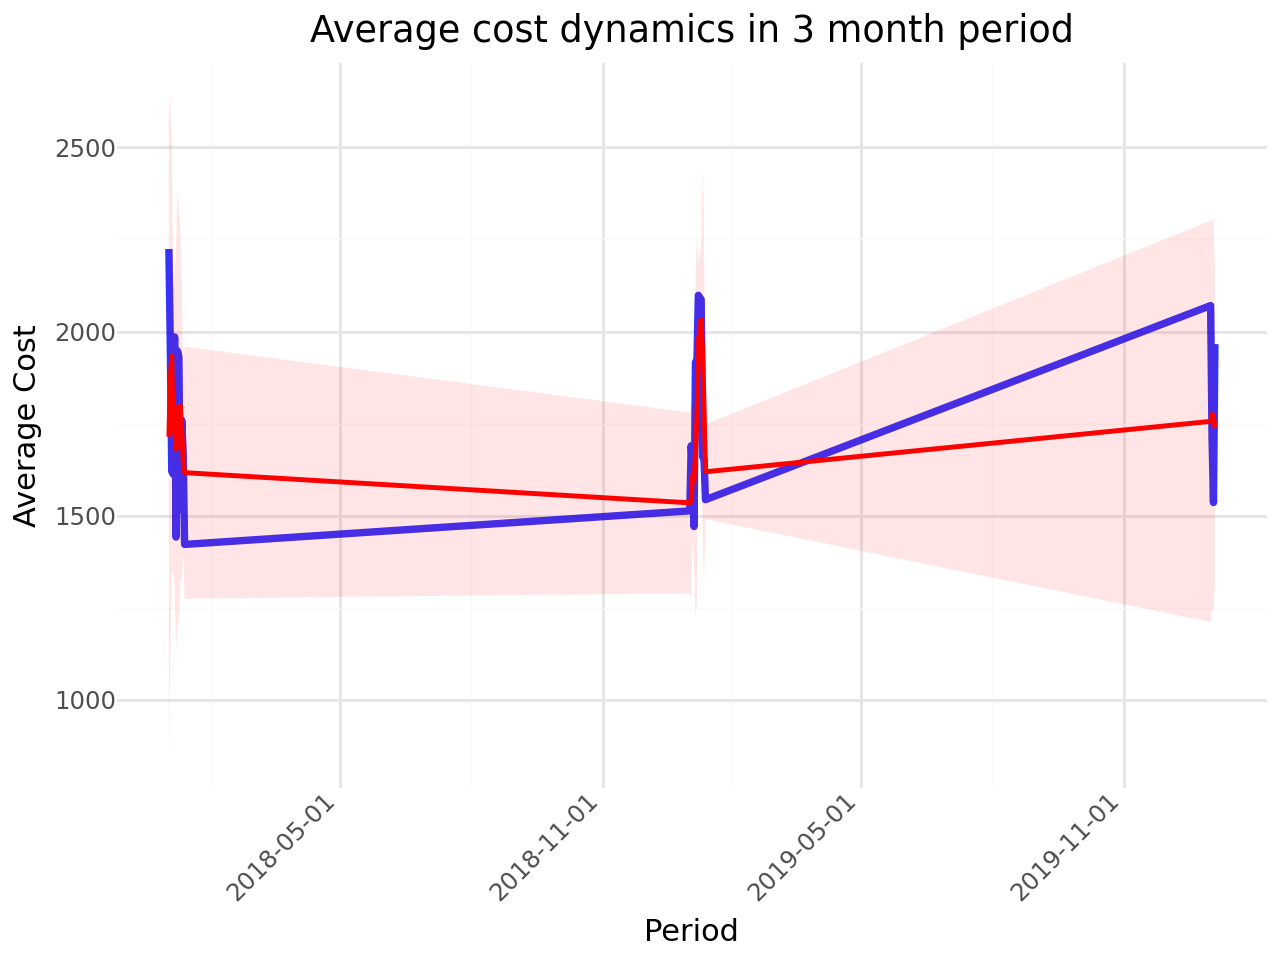

In [84]:
plot = (ggplot(df, aes(x='Period'))
        + geom_line(aes(y="Average_cost"),color='blue', alpha=0.8, size=1.5)
        + geom_line(aes(y='RollingMean'), color='red', size=1)
        + geom_ribbon(aes(ymin='LowerBound', ymax='UpperBound'), fill='red', alpha=0.1)
        + labs(title='Average cost dynamics in 3 month period',
               x='Period',
               y='Average Cost')
        + theme_minimal()
        + theme(axis_text_x=element_text(angle=45, hjust=1))
)
plot